In [220]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.special as special

# 7)
$$p(k)=\frac{\lambda^k}{k!}e^{-\lambda} \qquad M[\xi]=\lambda$$

In [221]:
mi = np.array([109, 65, 22, 3, 1])
n = np.sum(mi)
a = np.array([i for i in range(5)])

lambda_est = np.sum(mi / n * a)
pi = (lambda_est ** a) / (special.factorial(a)) * np.exp(-lambda_est)
npi = pi * n
print(f"{npi=}")

npi=array([108.67017381,  66.28880603,  20.21808584,   4.11101079,
         0.62692915])


Совмещаем 2-4

In [222]:
mi = np.array([mi[0], mi[1], np.sum(mi[2:5])])
a = np.array([0, 1])

pi = (lambda_est ** a) / (special.factorial(a)) * np.exp(-lambda_est)
pi = np.append(pi, 1 - np.sum(pi))
npi = pi * n
print(f"{npi=}")

npi=array([108.67017381,  66.28880603,  25.04102016])


In [223]:
delta = float(np.sum((npi-mi)**2 / npi))
print(f"{delta=}")

p_value = float(1-stats.chi2.cdf(delta, 2))
print(f"{p_value=}")

delta=0.06278383104696572
p_value=0.969095694994221


Нет оснований отвергнуть гипотезу

# 8)

In [224]:
m = np.array([
    [25, 50, 25],
    [52, 41, 7]
])
n = np.sum(m)
p = np.sum(m, axis=1) / n
q = np.sum(m, axis=0) / n

delta = 0
h, w = m.shape
for i in range(h):
    for j in range(w):
        delta += np.square(m[i, j] - n * p[i] * q[j]) / (n * p[i] * q[j])
delta = float(delta)
print(f"{delta=}")

p_value=float(1-stats.chi2.cdf(delta, (h-1)*(w-1)))
print(f"{p_value=}")

delta=20.48264235764236
p_value=3.5665697735942636e-05


Отвергаем гипотезу о независимости

# 9)

In [225]:
m = np.array([
    [33, 43, 80, 144],
    [39, 35, 72, 154]
])
l, k = m.shape
n = np.sum(m)
nu = np.sum(m, axis=0) / n 

delta = 0
for i in range(l):
    mi = m[i, :]
    ni = mi.sum()
    delta += float(np.sum((mi - ni * nu) ** 2 / (ni * nu)))
print(f"{delta=}")

p_value=float(1-stats.chi2.cdf(delta, (k-1)*(l-1)))
print(f"{p_value=}")

delta=2.0771359218904255
p_value=0.5565521530460769


Нет оснований отвергать гипотезу

# 10)

In [226]:
a = np.array([i for i in range(10)])
mi = np.array([5, 8, 6, 12, 14, 18, 11, 6, 13, 7])
n= np.sum(mi)

sample = []
for i in range(len(mi)):
    sample += ([i] * mi[i])
sample = np.array(sample)

## a)

$$H_0: \xi \sim R(0, 10)$$

### Критерий $\chi^2$:
$$\Delta=\sum_{i=1}^{k}\frac{(np_i - m_i)^{2}}{np_i} $$

In [227]:
pi = np.array([1/10 for i in range(10)])
delta = float(np.sum((n * pi - mi) ** 2 / (n * pi)))
print(f"{delta=}")

p_value=float(1-stats.chi2.cdf(delta, 10 - 1))
print(f"{p_value=}")

delta=16.4
p_value=0.058984030544419475


Нет оснований отвергать гипотезу

### Критерий Колмогорова
$$\Delta = \sqrt{n}\sup \limits_{x\in\R} |\tilde{F}(x)-F(x)|$$

delta=1.3993999399939994
p_value=0.03981541645689525


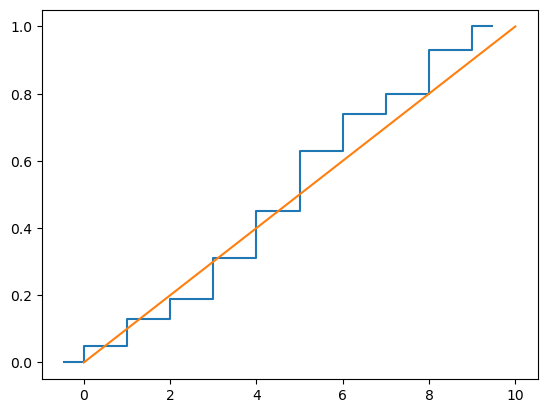

In [228]:
x = np.linspace(0, 10, 10000)
ecdf = stats.ecdf(sample).cdf
tf = ecdf.evaluate(x)
f = cdf = stats.uniform.cdf(x, 0, 10)

ax = plt.subplot()
_ = ecdf.plot(ax)
_ = ax.plot(x, f)

delta = float(np.sqrt(n) * np.max(np.abs(tf - f)))
print(f"{delta=}")

p_value=float(special.kolmogorov(delta))
print(f"{p_value=}")

Отвергаем гипотезу

## b)

$$H_0: \xi \sim N(\theta_1, \theta_2^2)$$

### Критерий $\chi^2$:

$$L(\theta)=P_1^{m_1}\dots P_k^{m_k} \qquad L(\theta)\to\max$$

In [229]:
from scipy.optimize import differential_evolution

def L(x):
    loc = x[0]
    scale = x[1]

    pi = stats.norm.cdf([1, 2, 3, 4, 5, 6, 7, 8, 9], loc=loc, scale=scale)
    product = pi[0] ** mi[0]
    for i in range(8):
        product *= (pi[i + 1] - pi[i]) ** mi[i+1]
    product *= (1 - pi[-1]) ** mi[-1]

    return - product


theta_1, theta_2 = differential_evolution(
    func=L,
    bounds=[(3, 7), (1, 4)],
    maxiter=10000,
).x

print(f"{theta_1=}")
print(f"{theta_2=}")

theta_1=np.float64(5.289512509099219)
theta_2=np.float64(2.672924991328697)


In [230]:
pi = stats.norm.cdf([1, 2, 3, 4, 5, 6, 7, 8, 9], theta_1, theta_2)

npi = []
npi.append(pi[0])
for i in range(8):
    npi.append(pi[i + 1] - pi[i])
npi.append(1 - pi[-1])
npi = np.array(npi)
npi *= n

$$\Delta=\sum_{i=1}^{n}\frac{(np_i(\vec{\theta})-m_i)^{2}}{np_i(\vec{\theta})}$$

In [231]:
delta = float(np.sum((npi-mi)**2 / npi))
print(f"{delta=}")

p_value = float(1-stats.chi2.cdf(delta, 10 - 1 - 2))
print(f"{p_value=}")

delta=9.808764981490027
p_value=0.1996720906305709


Нет оснований отвергать гипотезу

### Критерий Колмогорова

In [232]:
def delta_l(x):
    x = np.sort(x)

    mean = np.mean(x)
    std = np.std(x, ddof=1)

    ecdf = np.append([0], stats.ecdf(x).cdf.probabilities)
    cdf = stats.norm.cdf(x, mean, std)
    delta = np.sqrt(n) * np.max(np.abs(
        np.append(
            cdf - ecdf[:len(ecdf) - 1],
            cdf - ecdf[1:]
        )
    ))

    return delta

mean = np.mean(sample)
std = np.std(sample, ddof=1)

bs = np.ndarray((50000))
for i in range(50000):
    resample = np.random.normal(mean, std, n)
    bs[i] = delta_l(resample)


x = np.linspace(0, 10, 10000)
ecdf = stats.ecdf(sample).cdf
tf = ecdf.evaluate(x)
f = stats.norm.cdf(x, mean, std)

delta = float(np.sqrt(n) * np.max(np.abs(tf - f)))
print(f"{delta=}")

p_value = np.count_nonzero(bs >= delta) / 50000
print(f"{p_value=}")

delta=1.001955029161189
p_value=0.0152


Отвергаем гипотезу